## Multiple Seaborn Plots on a Canvas

this code demonstrates how to interlay multiple plots onto a single canvas (plotting surface)

The basic idea is to create subplots axis `ax` then add each plot to the subplot. `ax=ax`. 

You can use this technique to:

- superimpose a one graph over another. (this is how lmplot works, btw)
- highlight a specific points on a graph

Both approaches are used in the example

<module 'matplotlib.pyplot' from '/home/jovyan/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

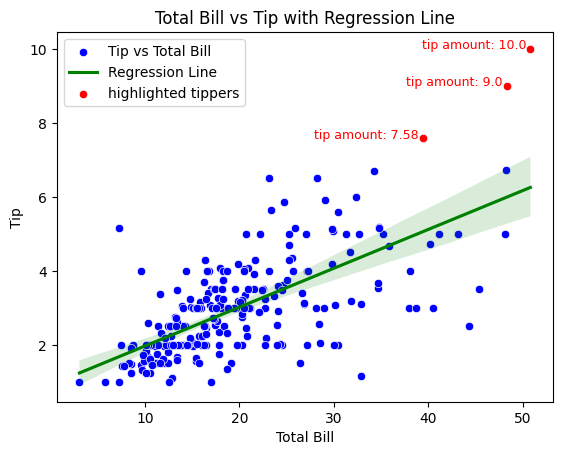

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Sample data
tips = sns.load_dataset("tips")

# Create a figure and axis
fig, ax = plt.subplots()

# Create a scatter plot of total bill vs amount tipped 
sns.scatterplot(data=tips, x="total_bill", y="tip", ax=ax, color='blue', label='Tip vs Total Bill')

# Create "regression" or best fit line.
sns.regplot(data=tips, x="total_bill", y="tip", ax=ax, scatter=False, color='green', label='Regression Line')

# Sample 3 random points to "highlight". This can be your specific filter
# in this example we highlight the top three "big tippers"
highlight = tips.sort_values("tip", ascending=False).head(3)

# plot the highlighted sample, same as the scatterplot, but a different color
sns.scatterplot(data=highlight, x="total_bill", y="tip",  ax=ax, color="red", label="highlighted tippers")

# Loop over each highlight to add text to the point
for index, row in highlight.iterrows():
    # add text to the plot
    label = f'tip amount: {row["tip"]} '
    ax.text(x=row["total_bill"], y=row["tip"], s=label , color='red', fontsize=9, ha='right')

# Add X and Y labels and  a title
ax.set_title("Total Bill vs Tip with Regression Line")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
ax.legend()

# Show the plot
display(plt)